IMPORTING LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


IMPORT DATA

In [5]:
df=pd.read_csv('/Users/harshkumawat/Desktop/GDSC TASK/data.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.shape

(4177, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Graphical Analysis

1. Sex & Rings

['M' 'F' 'I']


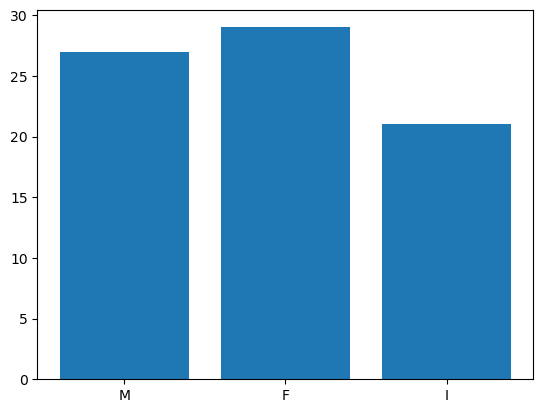

In [11]:
print(df['Sex'].unique())
plt.bar(df['Sex'], df['Rings'])
plt.show()

2. Length & Rings

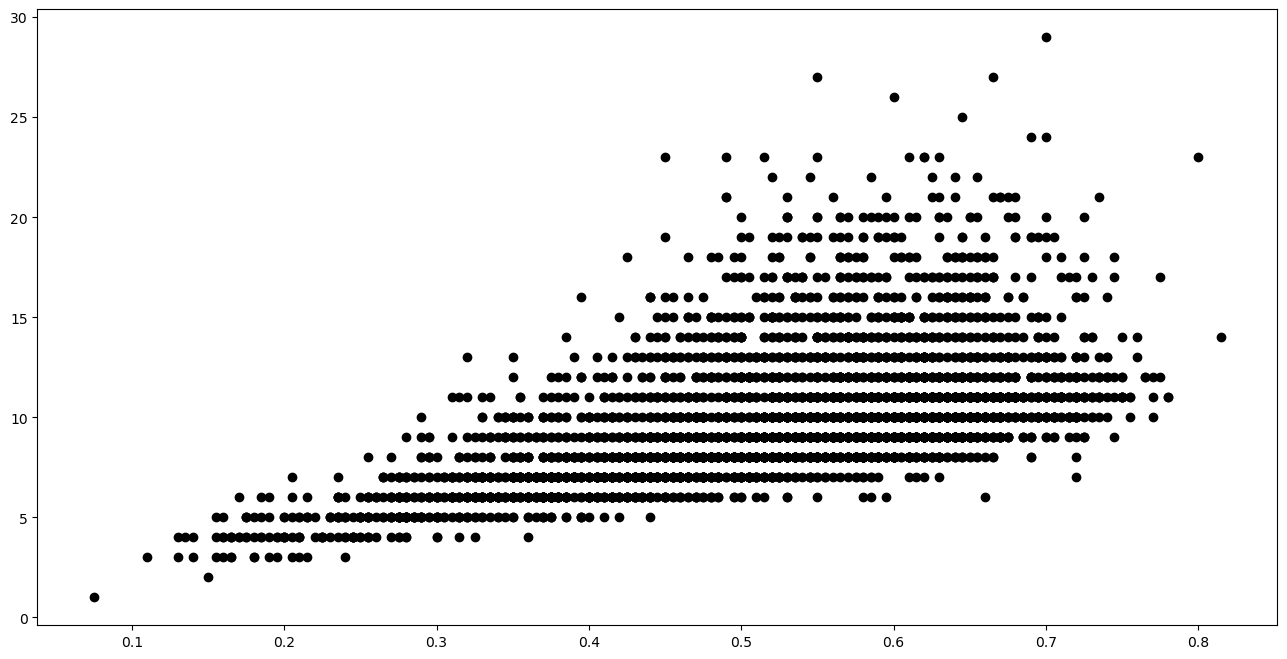

In [12]:
plt.figure (figsize= (16, 8))
plt.scatter (df['Length'], df['Rings'], c='black')
plt.show ()


3. Height & Rings

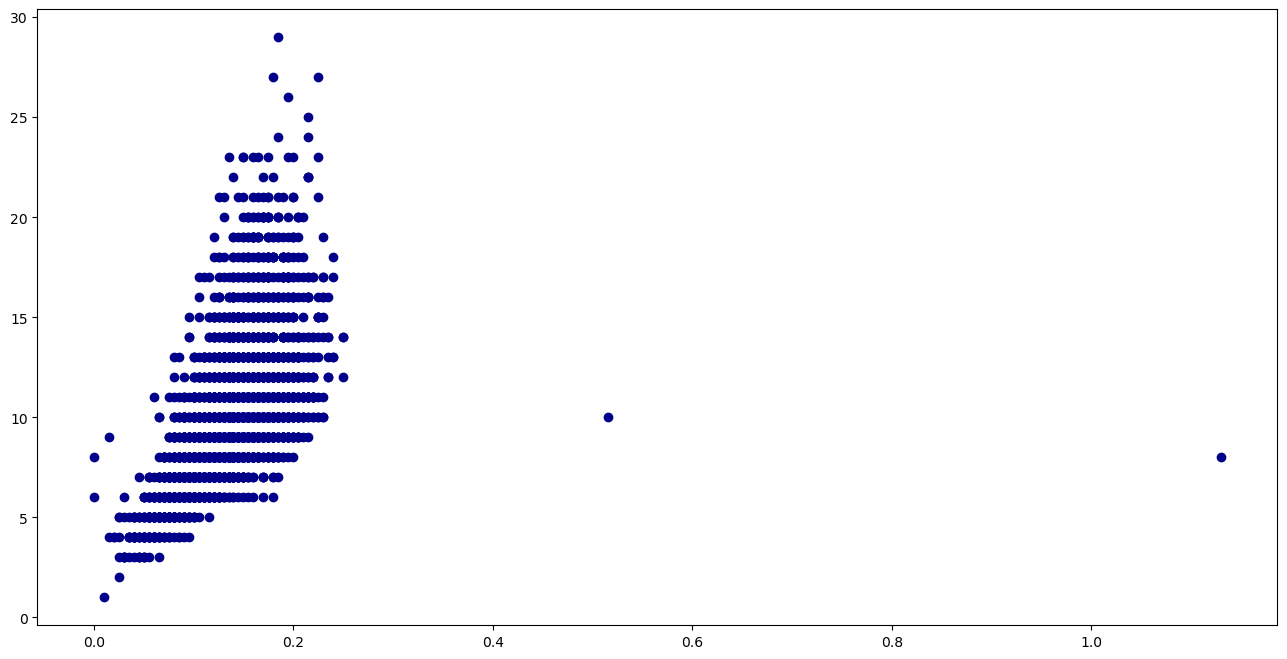

In [13]:
plt.figure (figsize= (16, 8))
plt.scatter (df['Height'], df['Rings'], c='darkblue')
plt.show ()


3.1 Removing Outliers from Height

In [14]:
max_thresold = df['Height'].quantile(0.9996)
max_thresold

0.3373440000000073

In [15]:
df[df['Height']>max_thresold]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


In [16]:
df= df.drop(df.index[[1417,2051]])

In [17]:
df.index[1417]

1418

In [18]:
new_df = df. loc[(df['Height'] < max_thresold)]
print( 'Size of new data:' ,len (new_df))

Size of new data: 4175


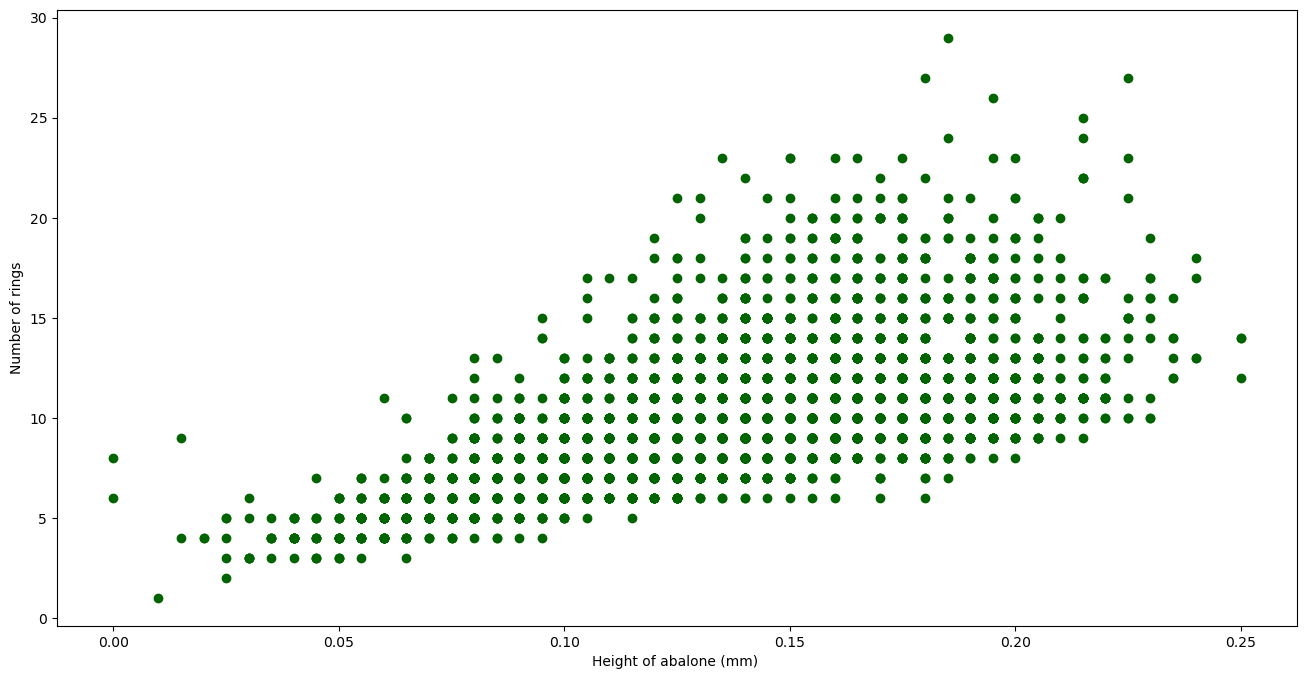

In [19]:
plt.figure (figsize= (16, 8))
plt.scatter (df['Height'], df['Rings'], c='darkgreen')
plt.xlabel ('Height of abalone (mm) ') 
plt.ylabel ("Number of rings") 
plt.show ()


4. Diameter & Rings

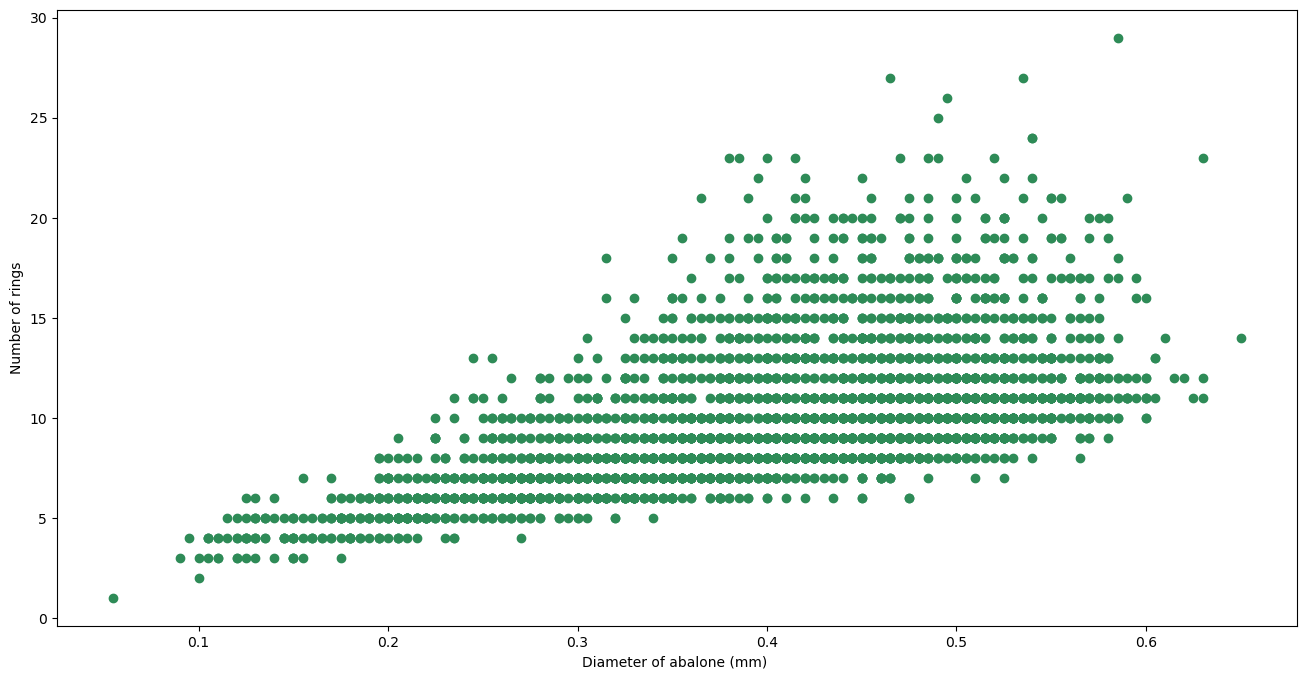

In [20]:
plt.figure (figsize= (16, 8))
plt.scatter (df['Diameter'], df['Rings'], c='seagreen')
plt.xlabel ('Diameter of abalone (mm) ') 
plt.ylabel ("Number of rings") 
plt.show ()


5. Whole Weight & Rings

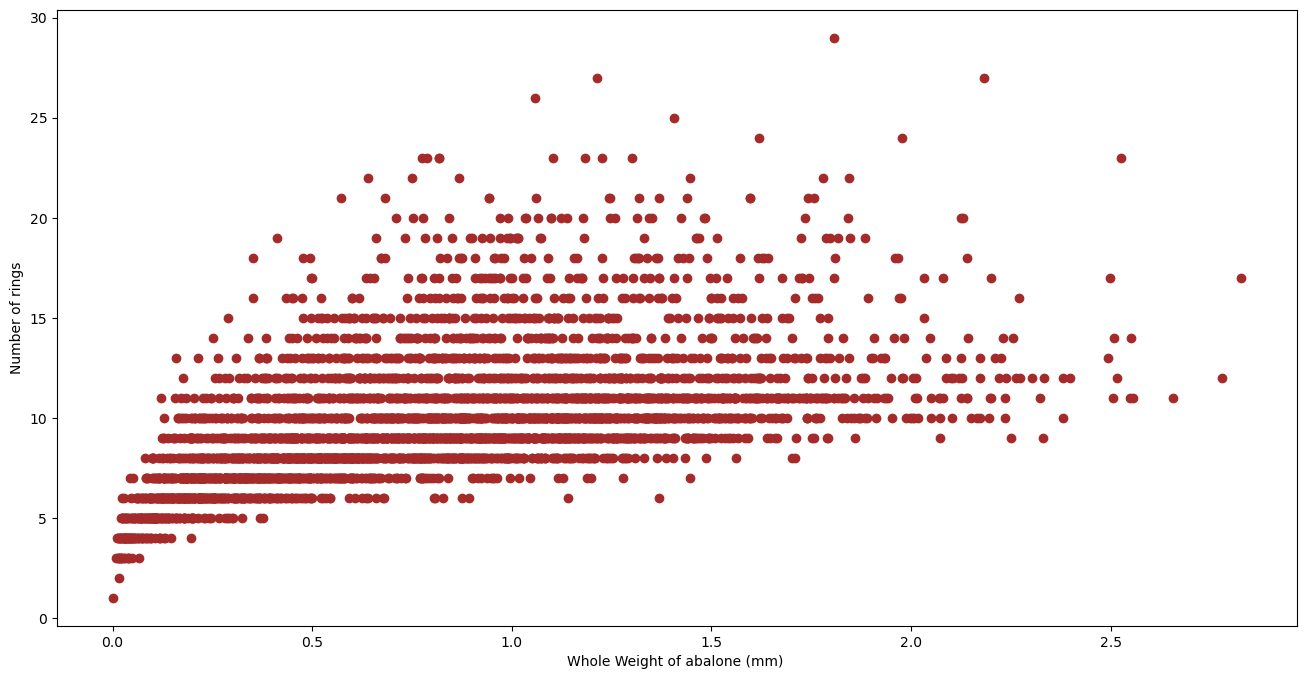

In [21]:
plt.figure (figsize= (16, 8))
plt.scatter (df['Whole weight'], df['Rings'], c='brown')
plt.xlabel ('Whole Weight of abalone (mm) ') 
plt.ylabel ("Number of rings") 
plt.show ()


LABEL ENCODING ON SEX

In [22]:
label = preprocessing.LabelEncoder() 
df['Sex']= label.fit_transform(df['Sex']) 
print(df['Sex'].unique())
df['age'] = df['Rings'] + 1.5
df



[2 0 1]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


DATA SPLITTING

In [23]:
x= df.drop(columns=['age','Rings'], axis=1)
y= df['age']


In [24]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [25]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4175, dtype: float64

TRAIN-TEST SPLIT

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3340, 8)
Shape of x_test : (835, 8)
Shape of y_train : (3340,)
Shape of y_test : (835,)


In [27]:
x_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
188,0,0.630,0.480,0.160,1.1990,0.5265,0.3350,0.315
2326,2,0.430,0.345,0.115,0.3045,0.0925,0.0550,0.120
219,0,0.415,0.305,0.130,0.3200,0.1305,0.0755,0.105
380,2,0.605,0.470,0.180,1.1405,0.3755,0.2805,0.385
218,2,0.470,0.360,0.135,0.5010,0.1665,0.1150,0.165
...,...,...,...,...,...,...,...,...
1033,2,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.477
3266,0,0.495,0.385,0.135,0.6625,0.3005,0.1635,0.185
1654,1,0.595,0.460,0.150,0.8335,0.3770,0.1925,0.235
2609,0,0.630,0.495,0.200,1.4255,0.6590,0.3360,0.380


In [28]:
y_train

188     12.5
2326    12.5
219      9.5
380     16.5
218     11.5
        ... 
1033    11.5
3266    12.5
1654     9.5
2609    12.5
2734     9.5
Name: age, Length: 3340, dtype: float64

MULTIPLE LINEAR REGRESSION MODEL TRAINGING

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

DATA PREDICTION

In [30]:
y_pred=lr.predict(x_test)

R2 SCORE CALCULATION

In [31]:
from sklearn.metrics import r2_score, explained_variance_score,max_error,mean_absolute_error
r2=r2_score(y_test,y_pred)
vs=explained_variance_score(y_test,y_pred)
r2=round(r2,3)
me=mean_absolute_error(y_test,y_pred)
me=round(me,2)
e=max_error(y_test,y_pred)
e=round(e,3)
print("The R2 and Variance Score of Model is: ", r2)
print("The Maximum Possible Error is: ",e,"%")
print("The Mean Absolute Error is: ",me)
print("The Accuracy of Model is: ", r2*100,"%")


The R2 and Variance Score of Model is:  0.512
The Maximum Possible Error is:  13.93 %
The Mean Absolute Error is:  1.61
The Accuracy of Model is:  51.2 %


GRAPHICAL PLOTTING

<Axes: xlabel='age'>

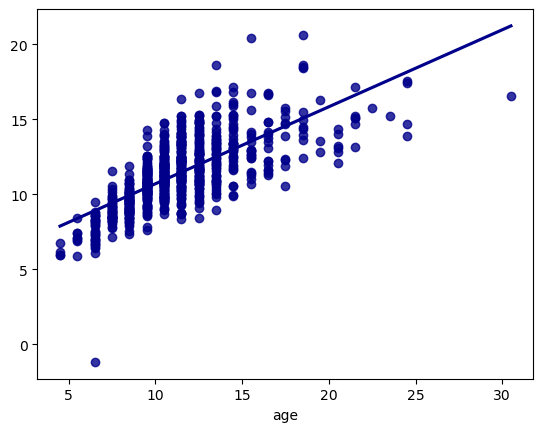

In [33]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='darkblue')